In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('data/atepc_result.csv')
data.head(10)

,sentence,IOB,tokens,aspect,position,sentiment,probs,confidence
0,good offer use voucher seller equal offer good...,"['O', 'B-ASP', 'O', 'O', 'O', 'O', 'O', 'O', '...","['good', 'offer', 'use', 'voucher', 'seller', ...",['offer'],[[1]],['Positive'],"[[0.1311144232749939, 0.0005233818083070219, 0...",[0.8684]
1,extrem baggi pp interrupt propo overal design ...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['extrem', 'baggi', 'pp', 'interrupt', 'propo'...",[],[],[],[],[]
2,1 becom baggi 2 screen seller protect buyer bu...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['1', 'becom', 'baggi', '2', 'screen', 'seller...",['pictur'],[[35]],['Negative'],"[[0.993370771408081, 0.0006470822845585644, 0....",[0.9934]
3,updat rate one star show relea payment vendor ...,"['B-ASP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...","['updat', 'rate', 'one', 'star', 'show', 'rele...",['updat'],[[0]],['Negative'],"[[0.9990673661231995, 0.0005860859528183937, 0...",[0.9991]
4,anoth pp indulg capit bia seller do not realli...,"['O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', '...","['anoth', 'pp', 'indulg', 'capit', 'bia', 'sel...",['seller'],[[5]],['Negative'],"[[0.9991857409477234, 0.00038753350963816047, ...",[0.9992]
5,easi conveni use,"['O', 'O', 'B-ASP']","['easi', 'conveni', 'use']",['use'],[[2]],['Positive'],"[[0.00043254659976810217, 0.000280077249044552...",[0.9993]
6,easi conveni way buy mani thing onlin via show,"['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O', 'O']","['easi', 'conveni', 'way', 'buy', 'mani', 'thi...",['buy'],[[3]],['Neutral'],"[[0.0008300502668134868, 0.5570651292800903, 0...",[0.5571]
7,well inform updat,"['O', 'B-ASP', 'O']","['well', 'inform', 'updat']",['inform'],[[1]],['Negative'],"[[0.997951090335846, 0.0005086053861305118, 0....",[0.998]
8,good servic,"['O', 'B-ASP']","['good', 'servic']",['servic'],[[1]],['Positive'],"[[0.0003818553523160517, 0.0002069895999738946...",[0.9994]
9,face promot clickbait trust build moment open ...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['face', 'promot', 'clickbait', 'trust', 'buil...",['sake'],[[12]],['Neutral'],"[[0.061028722673654556, 0.9372519254684448, 0....",[0.9373]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    1499 non-null   object
 1   IOB         1500 non-null   object
 2   tokens      1500 non-null   object
 3   aspect      1500 non-null   object
 4   position    1500 non-null   object
 5   sentiment   1500 non-null   object
 6   probs       1500 non-null   object
 7   confidence  1500 non-null   object
dtypes: object(8)
memory usage: 93.9+ KB


In [4]:
# the only columns we are interested in are apsect_term, sentiment and confidence

data = data[['aspect', 'sentiment', 'confidence']]

In [5]:
# we drop the ones with no aspects terms
data = data[data['aspect'] != '[]']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   aspect      850 non-null    object
 1   sentiment   850 non-null    object
 2   confidence  850 non-null    object
dtypes: object(3)
memory usage: 26.6+ KB


In [6]:
# cleaning the data

data.loc[:, 'aspect'] = data['aspect'].str.replace('[', '')
data.loc[:, 'aspect'] = data['aspect'].str.replace(']', '')
data.loc[:, 'aspect'] = data['aspect'].str.replace("'", '')

data.loc[:, 'sentiment'] = data['sentiment'].str.replace('[', '')
data.loc[:, 'sentiment'] = data['sentiment'].str.replace(']', '')
data.loc[:, 'sentiment'] = data['sentiment'].str.replace("'", '')

data.loc[:, 'confidence'] = data['confidence'].str.replace('[', '')
data.loc[:, 'confidence'] = data['confidence'].str.replace(']', '')
data.loc[:, 'confidence'] = data['confidence'].str.replace("'", '')

aspect_df = data['aspect'].str.split(
    ',', expand=True).stack().reset_index(level=1, drop=True)
sentiment_df = data['sentiment'].str.split(
    ',', expand=True).stack().reset_index(level=1, drop=True).str.strip()
confidence_df = data['confidence'].astype(str).str.split(
    ',', expand=True).stack().reset_index(level=1, drop=True)

# Join the separate dataframes back together to create the final dataframe
final_data = pd.DataFrame({
    'aspect': aspect_df,
    'sentiment': sentiment_df,
    'confidence': confidence_df
})

# Convert confidence column back to float type
final_data['confidence'] = final_data['confidence'].astype(float)

data = final_data

data.head(10)

,aspect,sentiment,confidence
0,offer,Positive,0.8684
2,pictur,Negative,0.9934
3,updat,Negative,0.9991
4,seller,Negative,0.9992
5,use,Positive,0.9993
6,buy,Neutral,0.5571
7,inform,Negative,0.9980
8,servic,Positive,0.9994
9,sake,Neutral,0.9373
10,shop,Positive,0.9980


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aspect      916 non-null    object 
 1   sentiment   916 non-null    object 
 2   confidence  916 non-null    float64
dtypes: float64(1), object(2)
memory usage: 28.6+ KB


In [8]:
unique_aspects = data['aspect'].unique()
len(unique_aspects)
# data needs to be cleaned 

266

## Visualising Results

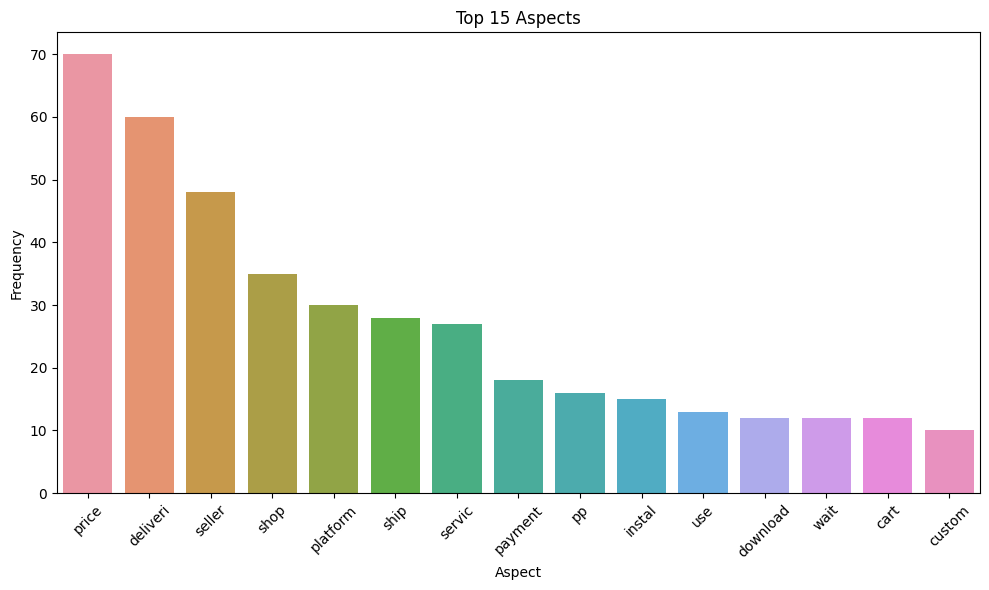

In [9]:
aspect_counts = data['aspect'].value_counts()

# Select the top N aspects to display (optional)
N = 15
top_aspects = aspect_counts.head(N)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_aspects.index, y=top_aspects.values)
plt.xlabel('Aspect')
plt.ylabel('Frequency')
plt.title(f'Top {N} Aspects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

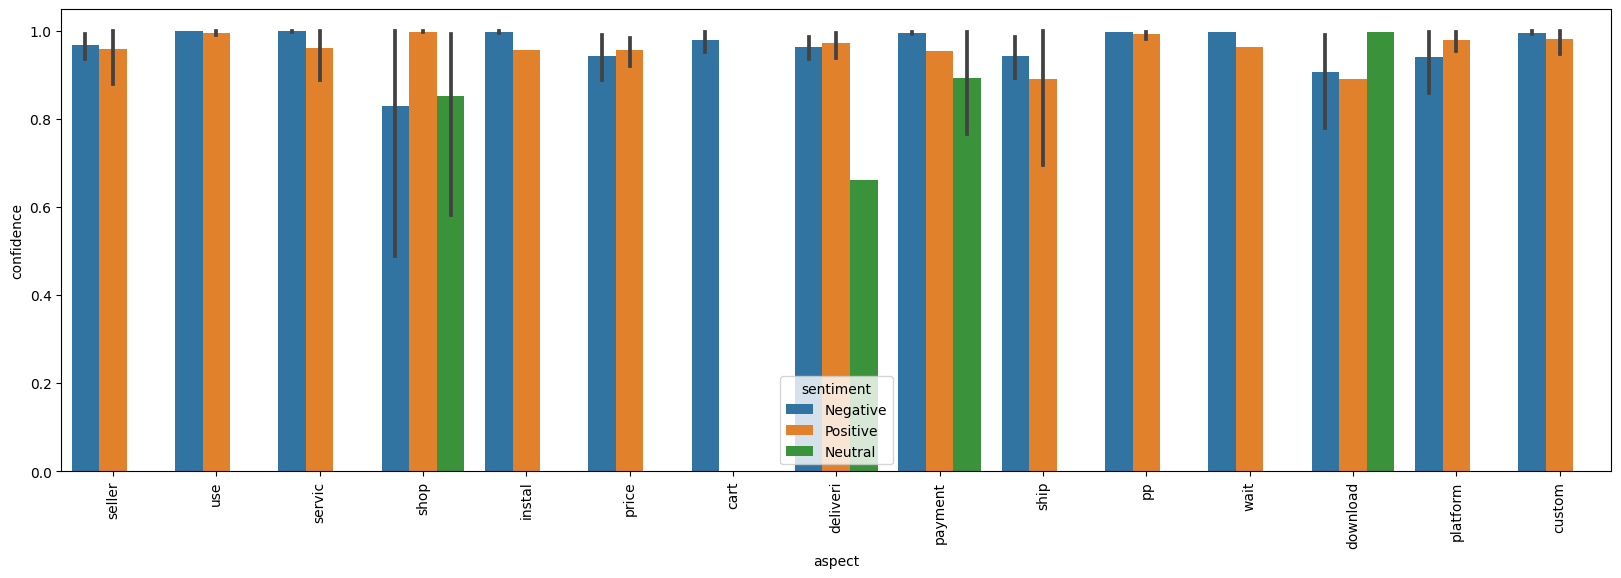

In [10]:
aspect_sentiment_counts = data.groupby(
    ['aspect', 'sentiment']).size().unstack()
aspect_sentiment_counts

filtered_data = data[data['aspect'].isin(top_aspects.index)]
filtered_data
# Plotting the grouped bar chart using seaborn
# color_dict = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

fig, ax = plt.subplots(figsize=(20, 6))


# plot the data
sns.barplot(data=filtered_data, x='aspect', y='confidence',
            hue='sentiment', ax=ax)

# rotate x labels for better visibility if there are many aspects
plt.xticks(rotation=90)

plt.show()

In [11]:

# pivot the data to create a matrix-like format
pivot_df = filtered_data.pivot_table(values='confidence', index='aspect', columns='sentiment', aggfunc=np.mean)
pivot_df

sentiment,Negative,Neutral,Positive
aspect,,,
cart,0.979192,NaN,NaN
custom,0.995640,NaN,0.981480
deliveri,0.963634,0.661000,0.972273
download,0.906462,0.997500,0.890500
instal,0.997764,NaN,0.955900
payment,0.996300,0.892433,0.953700
platform,0.941315,NaN,0.979129
pp,0.998450,NaN,0.992717
price,0.943615,NaN,0.956088


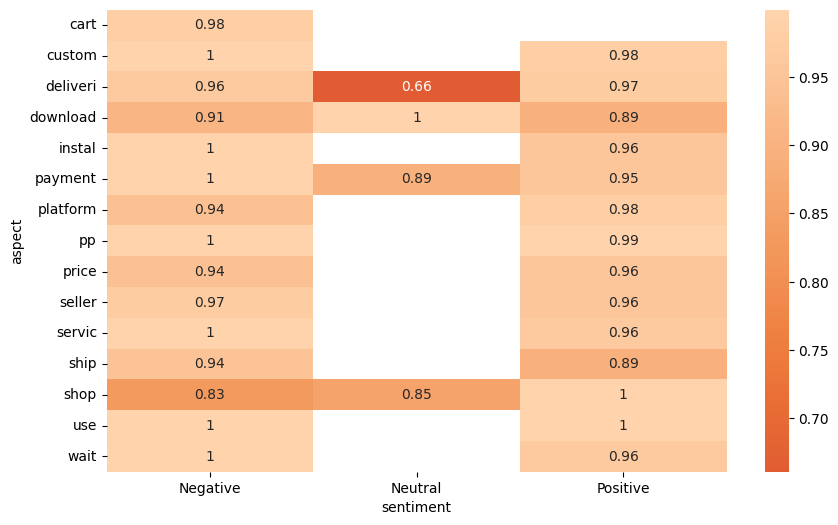

In [12]:

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(pivot_df, annot=True, center=0.0, ax=ax)

plt.show()

/var/folders/3_/1h_p1jg52g91lqypqw52zy440000gn/T/ipykernel_30437/3186994056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['color'] = filtered_data['sentiment'].map(color_dict)


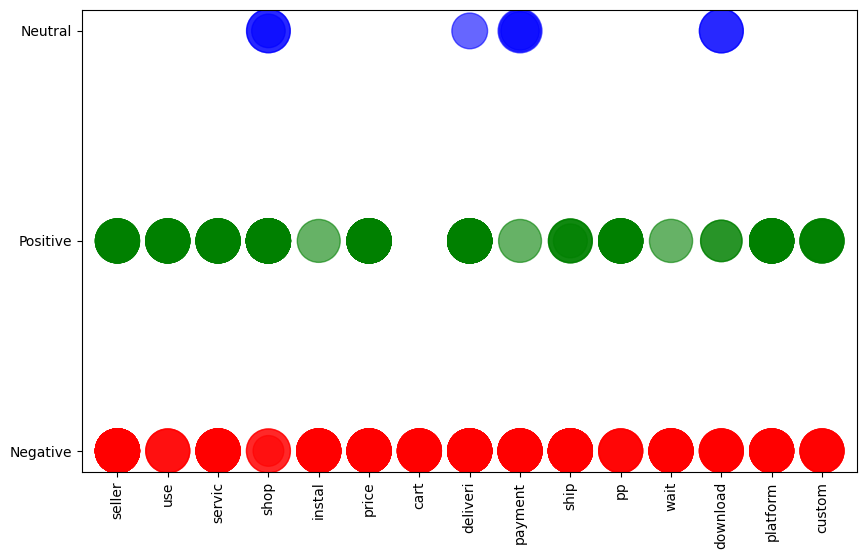

In [13]:
# create a color mapping for sentiments
color_dict = {'Positive': 'green', 'Negative': 'red' , 'Neutral': 'blue'}

# map sentiments to colors in the DataFrame
filtered_data['color'] = filtered_data['sentiment'].map(color_dict)

fig, ax = plt.subplots(figsize=(10, 6))

# plot the data
# you can adjust the multiplier on 'confidence' in s to get an appropriate size for your bubbles
scatter = ax.scatter(filtered_data['aspect'], filtered_data['sentiment'], s=filtered_data['confidence']*1000, c=filtered_data['color'], alpha=0.6)

# rotate x labels for better visibility
plt.xticks(rotation=90)

plt.show()